In [1]:
%pylab inline
g=9.8
k = 2.0*pi/4.0
h = 2.0
a = 0.1*h
sigma = tanh(k*h)
omega = (sqrt(g*k*sigma*(1.0 + (9.0 - 10.0*sigma**2 + 9.0*sigma**4*(k*a)**2)/(8.0*tanh(k*h)**4))))
c = omega/k
def theta(x,t):
    return k*x - omega*t
def eta(x,t):
    sigma = tanh(k*h)
    theta = k*x - omega*t
    return a*(cos(theta) + 0.5*k*a*cos(2.0*theta) + (3.0/8.0)*(k*a)**2*cos(3.0*theta))

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy import *
x,z,t = symbols('x,z,t')
Phi = omega*exp(k*z)*sin(k*x-omega*t)/k
u = diff(Phi,x)
w = diff(Phi,z)

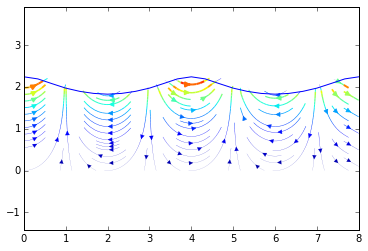

In [3]:
nn = 25
nt = 15
X = np.linspace(0,float(4.0*pi/k),nn)
Z = np.linspace(0,float(h+a),nn)
U = np.zeros((nn,nn),'d')
W = np.zeros((nn,nn),'d')
T=0.0
L = 6.0*pi/k
Tp = 4.0*pi/omega
for n,T in enumerate(np.linspace(0,Tp,nt)):
    for J,xi in enumerate(X):
        for I,zi in enumerate(Z):
            z_surf = h+eta(xi,T)
            if zi < z_surf:
                UIJ = (u.evalf(subs={x:xi,z:zi,t:T})).n()
                WIJ = (w.evalf(subs={x:xi,z:zi,t:T})).n()
                U[I,J] =  UIJ
                W[I,J] = WIJ
            else:
                U[I,J] = 0.0
                W[I,J] = 0.0
    speed = np.sqrt(U*U + W*W)
    hl = [h+eta(xi,T) for xi in X]
    pyplot.clf()
    pyplot.axis('equal')
    pyplot.plot(X,hl)
    pyplot.streamplot(X, Z, U, W,density=(1,1), color=speed,linewidth=2.5*speed/speed.max())
    pyplot.savefig('frame%4.4d.png' % n)

In [4]:
import subprocess
subprocess.call(r"ffmpeg -r 1 -y -i frame%4d.png -vcodec libx264 -sameq stokes3.mp4",shell=True)

127

In [5]:
from IPython.core.display import HTML
data_uri_mp4 = open("stokes3.mp4", "rb").read().encode("base64").replace("\n", "")
video_tag = """<video controls>
<source type ="video/mp4" src="data:video/mp4;base64,{mp4}"/>
Your browser does not support the video tag
</video>""".format(mp4=data_uri_mp4)
HTML(data=video_tag)